In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [264]:
data = pd.read_csv('/content/drive/MyDrive/Tugas ML/data/Sales_Transactions_Dataset_Weekly.csv')
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [265]:
data = data.drop(columns='Product_Code')
data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [266]:
X = data.iloc[:, 0:52]
X.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


In [267]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W0      811 non-null    int64
 1   W1      811 non-null    int64
 2   W2      811 non-null    int64
 3   W3      811 non-null    int64
 4   W4      811 non-null    int64
 5   W5      811 non-null    int64
 6   W6      811 non-null    int64
 7   W7      811 non-null    int64
 8   W8      811 non-null    int64
 9   W9      811 non-null    int64
 10  W10     811 non-null    int64
 11  W11     811 non-null    int64
 12  W12     811 non-null    int64
 13  W13     811 non-null    int64
 14  W14     811 non-null    int64
 15  W15     811 non-null    int64
 16  W16     811 non-null    int64
 17  W17     811 non-null    int64
 18  W18     811 non-null    int64
 19  W19     811 non-null    int64
 20  W20     811 non-null    int64
 21  W21     811 non-null    int64
 22  W22     811 non-null    int64
 23  W23     811 non

In [268]:
X.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


In [269]:
X.isnull().sum()

W0     0
W1     0
W2     0
W3     0
W4     0
W5     0
W6     0
W7     0
W8     0
W9     0
W10    0
W11    0
W12    0
W13    0
W14    0
W15    0
W16    0
W17    0
W18    0
W19    0
W20    0
W21    0
W22    0
W23    0
W24    0
W25    0
W26    0
W27    0
W28    0
W29    0
W30    0
W31    0
W32    0
W33    0
W34    0
W35    0
W36    0
W37    0
W38    0
W39    0
W40    0
W41    0
W42    0
W43    0
W44    0
W45    0
W46    0
W47    0
W48    0
W49    0
W50    0
W51    0
dtype: int64

In [270]:
X.duplicated().sum()

0

In [271]:
X.shape

(811, 52)

In [272]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

print('Explained Variance Ratio: ' + str(pca.explained_variance_ratio_.cumsum()[1]))

Explained Variance Ratio: 0.9296390897490129


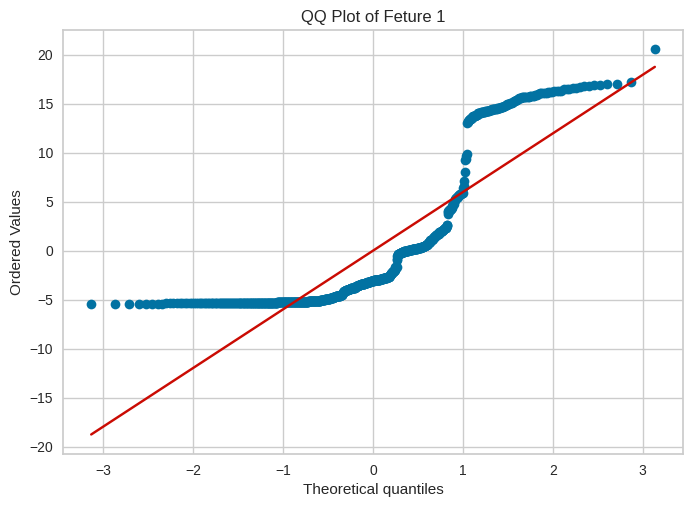

In [273]:

stats.probplot(pca_data[:,0], dist="norm", plot=pylab)
plt.title('QQ Plot of Feture 1')
pylab.show()

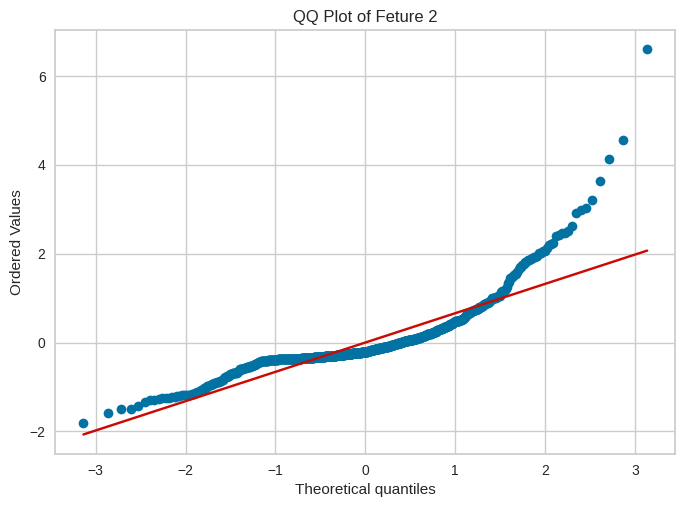

In [274]:
stats.probplot(pca_data[:,1], dist="norm", plot=pylab)
plt.title('QQ Plot of Feture 2')
pylab.show()

<ipython-input-275-2f49e706007a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pca_data)


Text(0.5, 1.0, 'Original Distribution')

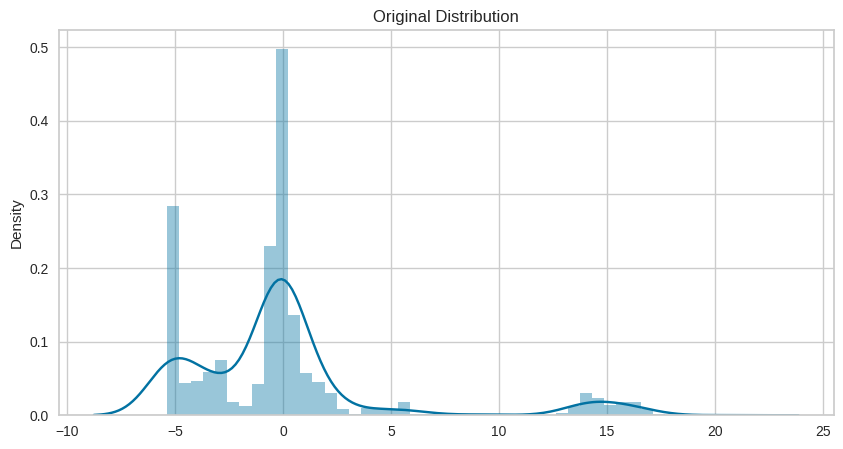

In [275]:
plt.figure(figsize=(10,5))
sns.distplot(pca_data)
plt.title('Original Distribution')

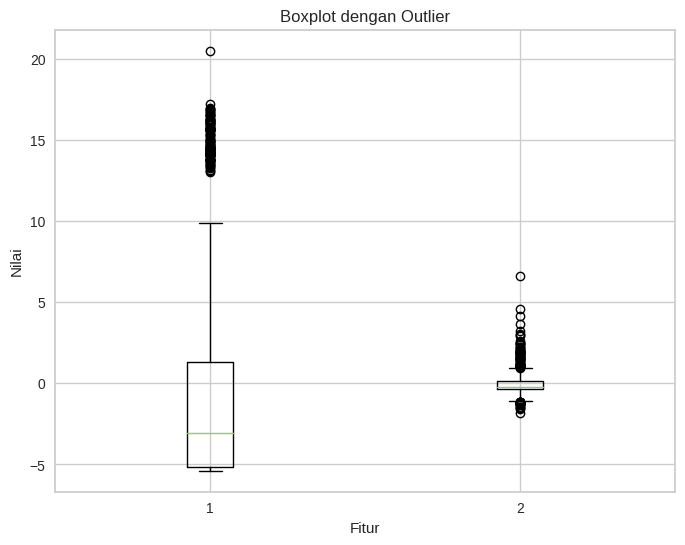

In [276]:
plt.figure(figsize=(8, 6))
plt.boxplot(pca_data)
plt.title('Boxplot dengan Outlier')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.show()

In [277]:
df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
df.head()

,PCA1,PCA2
0,0.454043,-0.605489
1,-2.960679,-0.550712
2,-0.092318,-0.236239
3,-0.366443,-0.320952
4,-0.283583,0.197146


In [278]:
def outlier(data):
  columns = data.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    outliers = data[(data[x]<lower_bound)|(data[x]>upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(f'Jumlah data outlier: {outlier_counts}')

Jumlah data outlier: {'PCA1': 120, 'PCA2': 90}


In [279]:
def remove_outlier(data):
  columns = data.select_dtypes(include=['int', 'float']).columns
  cleaned_data = data.copy()
  for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    cleaned_data = cleaned_data[(cleaned_data[column]>=lower_bound)&(cleaned_data[column]<=upper_bound)]

  return cleaned_data

for i in range(1,5):
  df = remove_outlier(df)

In [280]:
def outlier(data):
  columns = data.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  for x in columns:
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    outliers = data[(data[x]<lower_bound)|(data[x]>upper_bound)]
    outlier_counts[x] = len(outliers)

  return outlier_counts

outlier_counts = outlier(df)
print(f'Jumlah data outlier: {outlier_counts}')

Jumlah data outlier: {'PCA1': 9, 'PCA2': 8}


In [281]:
wcss=[]
for i in range(1,8):
  km = KMeans(i)
  km.fit(df)
  wcss.append(km.inertia_)
np.array(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

array([1721.83802079,  463.75370432,   89.09931957,   54.78429314,
         39.9720787 ,   31.97656352,   26.88144285])

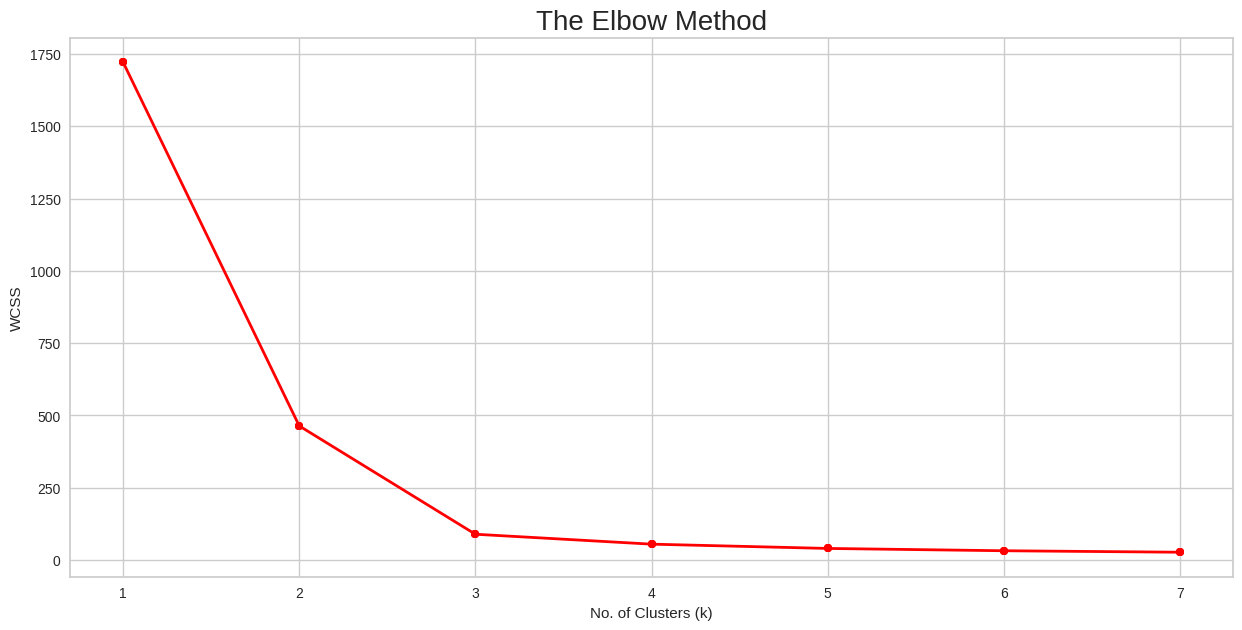

In [282]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,8), wcss, linewidth=2, color="red", marker ="8")
# plt.axvline(x=4, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [283]:
X = df.values
X

array([[-2.96067919, -0.5507116 ],
       [-0.09231795, -0.23623891],
       [-0.36644325, -0.32095246],
       ...,
       [-5.09004227, -0.10843819],
       [-5.19287132, -0.26613346],
       [-5.20752461, -0.3691923 ]])

In [284]:
kmen = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred_kmen = kmen.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


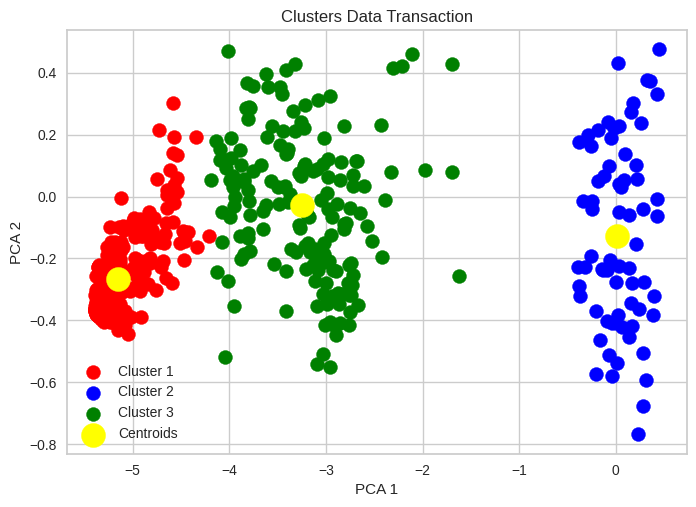

In [285]:
# Visualisasi hasil clusters
plt.scatter(X[y_pred_kmen == 0, 0], X[y_pred_kmen == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred_kmen == 1, 0], X[y_pred_kmen == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred_kmen == 2, 0], X[y_pred_kmen == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmen.cluster_centers_[:, 0], kmen.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters Data Transaction')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [286]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps=0.2, min_samples=10)
DB.fit(X)

y_pred_db = DB.labels_
y_pred_db

array([ 1,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0, -1,  1,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1, -1,  0,  1, -1,  0,  0,  1,  1,  0,  1, -1, -1,  0,  0,  1, -1,
        1,  1,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1,  0,  0,  1,
       -1,  1,  1, -1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  1, -1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,
        1,  1,  0, -1,  1,  1,  1,  0,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,
        1,  1,  2,  2,  1,  1,  1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1,  1,  2, -1,  2,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2

In [287]:
# Tambahkan label tersebut menjadi kolom baru didataset
df['Label_K-Means'] = DB.labels_
df.head()

,PCA1,PCA2,Label_K-Means
1,-2.960679,-0.550712,1
2,-0.092318,-0.236239,0
3,-0.366443,-0.320952,0
4,-0.283583,0.197146,0
5,-2.854310,0.052679,1


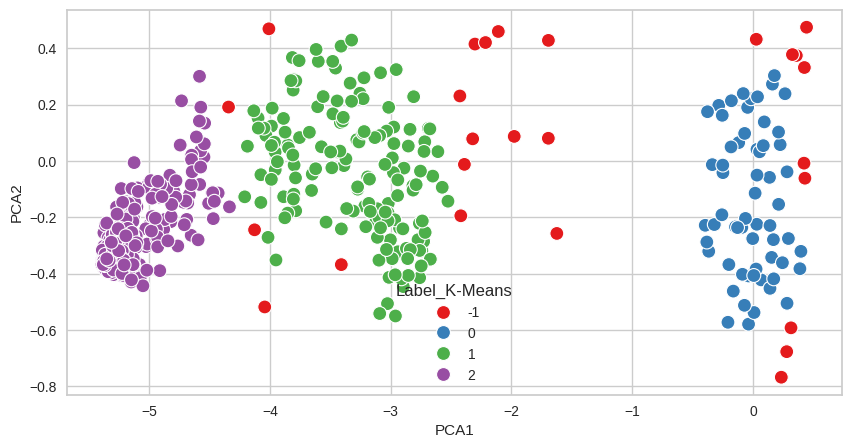

In [288]:
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'PCA1', y = 'PCA2',
                hue = 'Label_K-Means', data = df, palette = 'Set1', s=100);

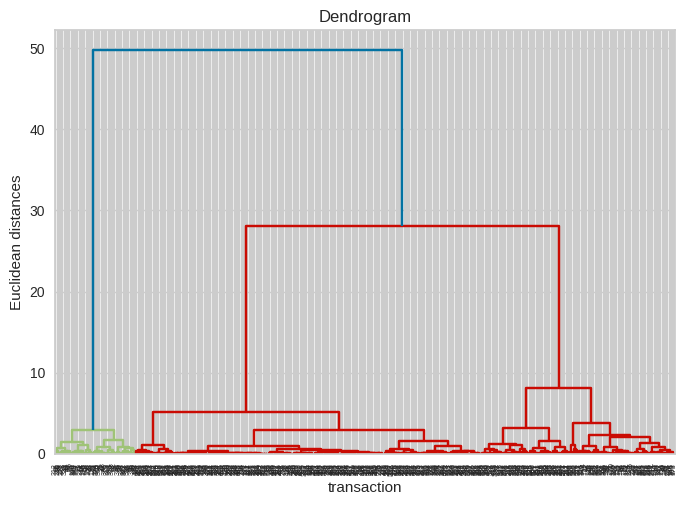

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


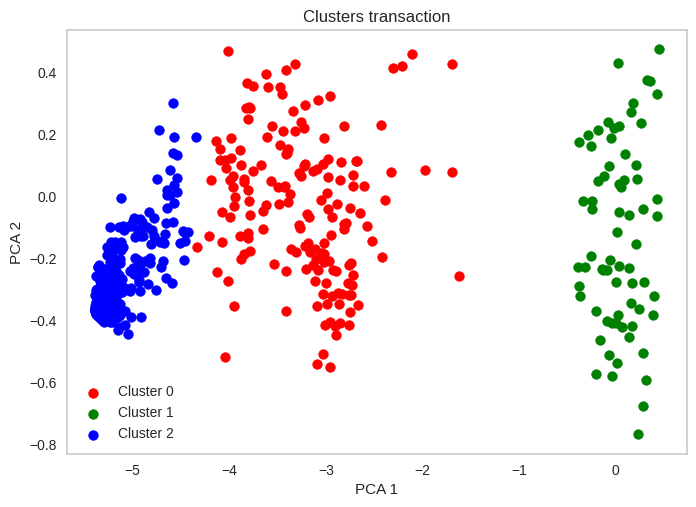

In [289]:
import scipy.cluster.hierarchy as hier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples

dendrogram = hier.dendrogram(hier.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('transaction')
plt.ylabel('Euclidean distances')
plt.show()

aglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_pred_aglo = aglo.fit_predict(X)

plt.scatter(X[y_pred_aglo == 0, 0], X[y_pred_aglo == 0, 1], s=50, c='red', label='Cluster 0')
plt.scatter(X[y_pred_aglo == 1, 0], X[y_pred_aglo == 1, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_pred_aglo == 2, 0], X[y_pred_aglo == 2, 1], s=50, c='blue', label='Cluster 2')

plt.title('Clusters transaction')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

In [290]:
# !pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

In [291]:
from sklearn_extra.cluster import KMedoids

kMedoids = KMedoids(n_clusters = 3, random_state = 42)
kMedoids.fit(X)
y_pred_kmed = kMedoids.fit_predict(X)

In [292]:
y_pred_kmed

array([2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

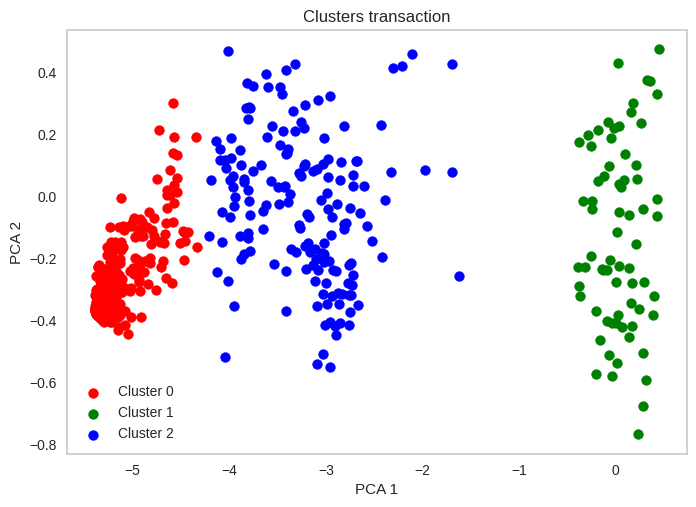

In [293]:
plt.scatter(X[y_pred_kmed == 0, 0], X[y_pred_kmed == 0, 1], s=50, c='red', label='Cluster 0')
plt.scatter(X[y_pred_kmed == 1, 0], X[y_pred_kmed == 1, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_pred_kmed == 2, 0], X[y_pred_kmed == 2, 1], s=50, c='blue', label='Cluster 2')

plt.title('Clusters transaction')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.grid()
plt.show()

###KMEN


In [294]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score

Evaluasi_KMeans = silhouette_score(X, y_pred_kmen)
print("Silhouette Score:", Evaluasi_KMeans)

Silhouette Score: 0.7608238439570403


###DBSCAN

In [295]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

Evaluasi_DBScan = silhouette_score(X, y_pred_db)
print("Silhouette Score:", Evaluasi_DBScan)

Silhouette Score: 0.700413181535133


###Aglo

In [296]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

Evaluasi_aglo = silhouette_score(X, y_pred_aglo)
print("Silhouette Score:", Evaluasi_aglo)

Silhouette Score: 0.7600389314829546


###KMedoids

In [297]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

Evaluasi_kmed = silhouette_score(X, y_pred_kmed)
print("Silhouette Score:", Evaluasi_kmed)

Silhouette Score: 0.7609558212152078
